In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sivqed.models.cavity import Cavity, MultiQubitCavity
import sivqed.models.fitter as fitter

plt.rcParams['font.size'] = 18

{'w_up': 17.45169585796885, 'g_up': 5.632473386729663, 'gamma_up': 0.12701956388564997, 'w_c': 0.0030748052955728833, 'k_in': 13.360671682480497, 'k_tot': 33.229008891134264, 'A': 1.044463809983517, 'B': 0.009958895793386153}


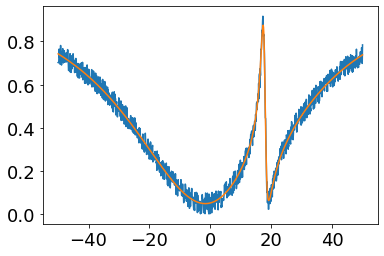

In [2]:
w_arr = np.linspace(-50, 50, 1000)
c = Cavity()
data = c.reflectance(w_arr, 1) + np.random.random(len(w_arr)) * 0.1 # Generate data
plt.plot(w_arr, data)

# w_up_1, g_up_1, gamma_up_1, w_c, k_in, k_tot, A
popt, cov = fitter.fit_reflection(w_arr, data, 
                            p0=[30, 1, 1, 1, 15, 30, 1, 0], 
                            bounds=([-np.inf, 0, 0, -np.inf, 0, 0, 0, -np.inf], 
                                    [np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf]))

print(popt)
plt.plot(w_arr, fitter.single_siv_ref(w_arr, **popt))
plt.show()

{'w_up_1': 17.48467413348416, 'g_up_1': 5.582547127424109, 'gamma_up_1': 0.08440866979843904, 'w_up_2': 149.91807934434192, 'g_up_2': 5.814751900134615, 'gamma_up_2': 0.08869309645086113, 'w_c': -0.10967466442003714, 'k_in': 15.029105005917025, 'k_tot': 32.86469908419957, 'A': 1.007080429315242, 'B': 0.03990036226252033}


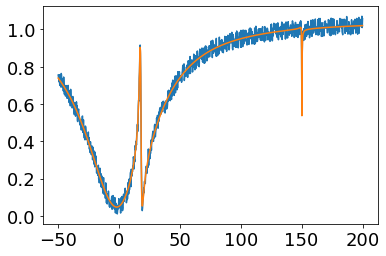

In [3]:
m = MultiQubitCavity(None, [{}, {"w_up": 150}])
w_arr = np.linspace(-50, 200, 1000)
data = m.reflectance(w_arr, 1) + np.random.random(len(w_arr)) * 0.1
plt.plot(w_arr, data)

# w_up_1, g_up_1, gamma_up_1, w_up_2, g_up_2, gamma_up_2, w_c, k_in, k_tot, A
popt, cov = fitter.fit_reflection(w_arr, data, fit_func=fitter.two_siv_ref,
                            p0=[30, 1, 1, 145, 1, 1, 1, 15, 30, 1, 0], 
                            bounds=([-np.inf, 0, 0, -np.inf, 0, 0, -np.inf, 0, 0, 0, -np.inf], 
                                    [np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf]))

print(popt)
plt.plot(w_arr, fitter.two_siv_ref(w_arr, **popt))
plt.show()